Uvozimo potrebne knjižnice za manipulacijo s podatki:

In [92]:
import random
import math
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d

Določimo točke znotraj kocke s stranico a=1 in v nadaljevanju določimo sfero, ki ima enako prostornina kot kocka

In [93]:
def kvadrat_tock_3D(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        x = random.random()
        y = random.random()
        z = random.random()
        slovar_tock['tocka_' + str(i)] = (x,y,y)
    return slovar_tock

Razdalje med točkami izračunamo s pomočjo Pitagorovega izreka.

In [94]:
def razdalje_3D(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = slovar[key1][0] - slovar[key2][0]
            delta_y = slovar[key1][1] - slovar[key2][1]
            delta_z = slovar[key1][2] - slovar[key2][2]
            razdalja = sqrt(delta_x^2 + delta_y^2 + delta_z^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)

#razdalje(kvadrat_tock(4))

Posamezna razdalja nam predstavlja preferenco (manjša kot je razdalja, večja je preferenca). Le te uredimo po velikosti, od najmanjše do največje, za vsako točko:

In [95]:
def preference_3D(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)


Algoritem je sestavljen iz dveh funkcij:
1) funkcija "Najkrajsa"  pregleda razdalje med točkami. Ko najde najmanjšo razdaljo izmed vseh, izbere tisti dve točki, med katerima ta razdalja nastopi in ju poveže v par. Na koncu nam vrne par točk, s pripadajočo najmanjšo razdaljo.

In [96]:
def Najkrajsa_3D(slovar):
    min_razdalja = sqrt(3)
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)


#Najkrajsa(preference(razdalje(tocke)))

2) funkcija "Vsi_pari" nam omogoči, da se čez 1. funckijo zapeljemo tolikokrat kolikokrat je potrebno in povežemo vse točke v pare. Na koncu nam vrne seznam vseh parov.

In [97]:
def Vsi_pari_3D(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa_3D(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)

#Vsi_pari(preference(razdalje(tocke)))
#Ali je primer_2 ujemanje?
#Vsi_pari(preference(razdalje(primer_2)))
#Vsi_pari(preference(razdalje(primer_3)))

S funkcijo "vsota_razdalj" izračunamo seštevek vseh razdalj med točkami, ki so skupaj v paru:

In [98]:
def vsota_razdalj_3D(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

#vsota_razdalj(preference(razdalje(tocke)),Vsi_pari(preference(razdalje(tocke))))

Na koncu pa še s pomočjo sledeče funkcije analiziramo, kako se obnaša naša vsota razdalj, ko povečujemo število točk.

In [99]:
def kvadrat_tock_3D_sfera(st_tock):
    slovar_tock = {}
    for i in range(st_tock):
        r = random.uniform(0,(3/(4*math.pi))^(1/3))
        alpha = 2 * math.pi * random.random()
        beta = math.pi * random.random()
        x = r * math.cos(alpha) * math.sin(beta)
        y = r * math.sin(alpha) * math.sin(beta)
        z = r * math.cos(beta)
        slovar_tock['tocka_' + str(i)] = (x,y,z)
    return slovar_tock

In [100]:
def razdalje_3D_sfera(slovar):
    slovar_razdalj = {}
    #a^2 + b^2 = c^2
    for key1 in slovar.keys():
        seznam_razdalj = []
        # for key in slovar.keys()
        for key2 in slovar.keys():
            if key1 == key2:
                continue
            delta_x = slovar[key1][0] - slovar[key2][0]
            delta_y = slovar[key1][1] - slovar[key2][1]
            delta_z = slovar[key1][2] - slovar[key2][2]
            razdalja = sqrt(delta_x^2 + delta_y^2 + delta_z^2)
            seznam_razdalj.append((key2,razdalja))
        slovar_razdalj[key1] = seznam_razdalj
    return(slovar_razdalj)

In [101]:
def preference_3D_sfera(slovar_razdalj):
    for key in slovar_razdalj.keys():
        sorted_by_second = sorted(slovar_razdalj[key], key=lambda tup: tup[1])
        slovar_razdalj[key] = sorted_by_second
    return(slovar_razdalj)

In [102]:
def Najkrajsa_3D_sfera(slovar):
    min_razdalja = sqrt(3)
    par = []
    for key1 in slovar.keys():
        #nastavimo min_razdaljo na najmanjso ki nastopa v slovarju
        if slovar[key1][0][1] <= min_razdalja:
            min_razdalja = slovar[key1][0][1]

    for key2 in slovar.keys():
        if slovar[key2][0][1] == min_razdalja:
            par = [slovar[key2][0][0], key2]
            break

    return(par, min_razdalja)

In [103]:
def Vsi_pari_3D_sfera(slovar):
    pari = []
    for i in range(len(slovar)/2):
        (par, najkrajsa) = Najkrajsa_3D_sfera(slovar)
        for e in par:
            # Izbrišemo točki v paru iz slovarja
            if str(e) in slovar:
                del slovar[str(e)]
            # izbrišemo to preferenco še vsem točkam v slovarju
            for elm in slovar.keys():
                #print(elm, slovar[elm])
                for tocka in slovar[elm]:
                    if e in tocka:
                        slovar[elm].remove(tocka)

        pari.append(par)
    return(pari)

In [104]:
def vsota_razdalj_3D_sfera(slovar, pari):
    vsota = 0
    # Pogledamo vse pare v "pari", poiščemo točko ki nastopa v slovarju in vzamemo dolžino iz njenih preferenc do točke, s katero je v paru.
    for e in pari:
        for i in range(len(slovar[e[0]])):
            if slovar[e[0]][i][0] == e[1]:
                vsota += slovar[e[0]][i][1]
    return(vsota)

In [105]:
def razlicne_vsote_3D_sfera(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj_3D_sfera(preference_3D_sfera(razdalje_3D_sfera(kvadrat_tock_3D_sfera(i))),Vsi_pari_3D_sfera(preference_3D_sfera(razdalje_3D_sfera(kvadrat_tock_3D_sfera(i)))))
    return(slovar_vsote)

In [106]:
def razlicne_vsote_3D(od, do, korak):
    slovar_vsote={}
    for i in range(od, do + 1, korak):
        slovar_vsote[i]=  vsota_razdalj_3D(preference_3D(razdalje_3D(kvadrat_tock_3D(i))),Vsi_pari_3D(preference_3D(razdalje_3D(kvadrat_tock_3D(i)))))
    return(slovar_vsote)


S funkcijo povprecje izracunamo povprečne vrednosti razdalj pri poljubnem številu ponovitev:

In [107]:
def povprecje_kocka(zacetek, konec, korak, ponovitve):
    povprecje = {}
    if ponovitve == 0:
        return povprecje
    base_slovar = razlicne_vsote_3D(zacetek, konec, korak)
    
    """zgeneriramo slovar tolikokrat kolikotr hocenmo ponovitev - 1 (base_slovar je prva ponovitev), 
    vsote pristecvamo v base slovar in koncen rezultat delimo s
    stevilom ponovitev da dobimo povprecje"""
    
    for x in range(ponovitve - 1):
        slovar = razlicne_vsote_3D(zacetek, konec, korak)
        for key, value in slovar.items():
            base_slovar[key] += value
    for key, value in base_slovar.items():
        povprecje[key] = value / ponovitve
    return povprecje

In [108]:
def povprecje_sfera(zacetek, konec, korak, ponovitve):
    povprecje = {}
    if ponovitve == 0:
        return povprecje
    base_slovar = razlicne_vsote_3D_sfera(zacetek, konec, korak)
    
    """zgeneriramo slovar tolikokrat kolikotr hocenmo ponovitev - 1 (base_slovar je prva ponovitev), 
    vsote pristecvamo v base slovar in koncen rezultat delimo s
    stevilom ponovitev da dobimo povprecje"""
    
    for x in range(ponovitve - 1):
        slovar = razlicne_vsote_3D_sfera(zacetek, konec, korak)
        for key, value in slovar.items():
            base_slovar[key] += value
    for key, value in base_slovar.items():
        povprecje[key] = value / ponovitve
    return povprecje

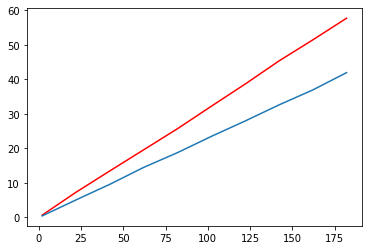

In [110]:
#slovar_3D = razlicne_vsote_3D(0,200,10)
#plt.plot(*zip(*sorted(slovar_3D.items())),'r')

kocka = povprecje_kocka(2, 200 ,20, 30)
sfera = povprecje_sfera(2, 200 ,20, 30)

plt.plot(*zip(*sorted(kocka.items())),'r')
#slovar_3D_sfera = razlicne_vsote_3D_sfera(0,200,10)
#plt.plot(*zip(*sorted(slovar_3D_sfera.items())))
plt.plot(*zip(*sorted(sfera.items())))

plt.show()